# CE-40957: Reinforcement Learning
## HW1

*Full name: Ali Abbasi*

*Student number: 98105879* 

In this notebook, you will learn about reinforcement learning and its implementation in OpenAI Gym environments. 


This notebook is intended to provide hands-on experience with implementing reinforcement learning algorithms and evaluating their performance. By working through the code and examples, you will gain a deeper understanding of how Q-learning and monte carlo method works and how it can be applied to real-world problems.

# 1. Q-learning

In [1]:
# !pip install gym[toy_text]
import os
import gym
import numpy as np
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output()


## Gym OpenAI Environments
`gym` is a library developed by OpenAI that provides a suite of environments for developing and comparing reinforcement learning algorithms. Each environment has a well-defined observation space and action space, as well as a reset function that returns the environment to its initial state.

The main steps involved in training an agent in a `gym` environment are:

1. Initialize the environment
2. Reset the environment to its initial state
3. Take an action in the current state
4. Observe the new state and reward
5. Update the agent's policy based on the observed reward and new state
6. Repeat steps 3 to 5 until the environment returns a "done" signal

Once the agent has learned a good policy, it can be evaluated by running it in the environment for several episodes and measuring its average reward.

### FrozenLake environment
The `FrozenLake-v1` environment is a variant of the classic reinforcement learning problem where the agent must navigate a grid while avoiding obstacles. 

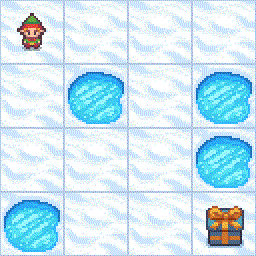


* **Observation Space:** The observation space of the environment is a grid representing the state of the lake.
* **Action Space:** The agent has four possible actions at each time step: move up, move down, move left, or move right.
* **Goal:** The goal of the agent is to reach the goal state while avoiding holes in the ice.
* **Reward:** Reach goal(G): +1 , Reach hole(H): 0 , Reach frozen(F): 0
* **Episode Termination:** The environment signals the end of an episode with a "done" signal.


In [88]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode='rgb_array')
spec = gym.spec('FrozenLake-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")


Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7



In [89]:
Actions = {0: 'LEFT',
           1: 'DOWN',
           2: 'RIGHT',
           3: 'UP'}


UP --> DOWN --> RIGHT


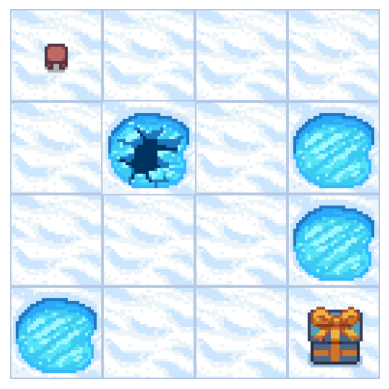

In [90]:
# Be free to test!
# take random actions, and see how the agent moves

env.reset()

action_seq = []

for i in range(3):
    action_number = env.action_space.sample()
    action_seq.append(Actions[action_number])
    env.step(action_number)

print(' --> '.join(action_seq))
env_screen = env.render()
plt.imshow(env_screen)
plt.axis('off');


## Q-Learning
Q-Learning is a model-free reinforcement learning algorithm that is used to find the optimal policy for an agent in an environment. It is based on the idea of updating an estimate of the optimal action-value function using the Bellman equation. The optimal action-value function is defined as the maximum expected reward that an agent can receive by taking an action a in a state s and following the optimal policy thereafter.

The action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [91]:
def epsilon_greedy(Q, state, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(0, 4)
    else:
        return greedy(Q, state)


def greedy(Q, state):
    return np.argmax(Q[state])


In [92]:
def q_learning(env, num_episodes, alpha, gamma, print_every=100):
    # Initialize the action-value function Q(s,a)
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    rewards = []
    # Loop over each episode
    for episode in range(num_episodes):

        state, info = env.reset()
        # epsilon policy
        epsilon = 1 - min(0.9, np.sqrt(2 * episode / num_episodes))
        running_reward = 0

        done = False
        while not done:
            action = epsilon_greedy(Q, state, epsilon)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            # Update the action-value function
            Q[state, action] += alpha * \
                (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state
            running_reward += reward

        rewards.append(running_reward)
        if (episode + 1) % print_every == 0:
            print(
                f'{episode}:\tmean reward = {np.mean(rewards)}\tepsilon = {epsilon}')
            rewards = []

    # Return the learned action-value function
    return Q


In [93]:
# change the parameters if needed
num_episodes = 10000
alpha = 0.1
gamma = 0.95

Q = q_learning(env, num_episodes, alpha, gamma, print_every=1000)

999:	mean reward = 0.027	epsilon = 0.5530100672274598
1999:	mean reward = 0.068	epsilon = 0.36770260161851054
2999:	mean reward = 0.142	epsilon = 0.2255324409634707
3999:	mean reward = 0.252	epsilon = 0.10568461938754514
4999:	mean reward = 0.352	epsilon = 0.09999999999999998
5999:	mean reward = 0.357	epsilon = 0.09999999999999998
6999:	mean reward = 0.326	epsilon = 0.09999999999999998
7999:	mean reward = 0.351	epsilon = 0.09999999999999998
8999:	mean reward = 0.359	epsilon = 0.09999999999999998
9999:	mean reward = 0.365	epsilon = 0.09999999999999998


In [95]:
state, info = env.reset()
done = False

env_screens = []

while not done:
    action = np.argmax(Q[state])
    env_screens.append((env.render(), action))
    new_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    state = new_state
    if done:
        print(f"Reward: {reward}")
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")
env_screens.append((env.render(), None))

Reward: 1.0
Successful episode!


In [96]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.

# small greed images
def visualize_game(env_screen_actions, n_cols=6):
    n_rows = np.ceil(len(env_screens) / n_cols).astype(int)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    ax = ax.flatten()
    for x in ax[len(env_screens):]:
        x.axis('off')
    for i, (env_screen, action) in enumerate(env_screens):
        ax[i].imshow(env_screen)
        ax[i].axis('off')
        if action is not None:
            ax[i].set_title(Actions[action])
        else:
            ax[i].set_title('End')

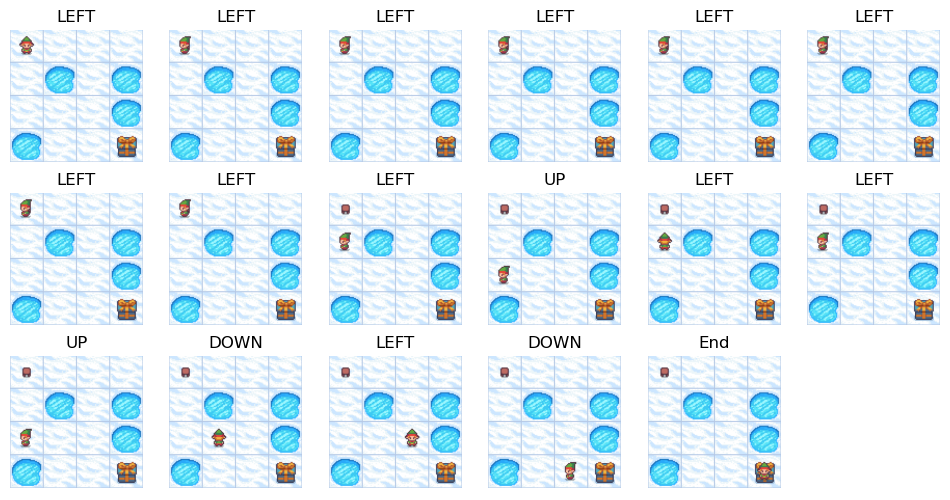

In [97]:
visualize_game(env_screens)

Because of randomness of the environment, the agent may not reach the goal in few steps.

## SARSA
SARSA (State-Action-Reward-State-Action) is a popular reinforcement learning algorithm used for finding an optimal policy in an environment. Like Q-learning, SARSA is an off-policy algorithm that updates the values of the Q-table based on the observed rewards and next state-action pairs.

The key difference between SARSA and Q-learning is in the selection of the next action. In SARSA, the next action is selected based on the current policy, whereas in Q-learning, the next action is selected based on the greedy policy. This means that in SARSA, the algorithm is learning about the expected returns from the current policy, whereas in Q-learning, the algorithm is learning about the optimal policy.

Mathematically, the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.


In [6]:
def sarsa(env, num_episodes, alpha, gamma, print_every=100):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []

    for episode in range(num_episodes):
        state, info = env.reset()
        done = False
        running_reward = 0

        # epsilon policy
        epsilon = 1 - min(0.9, np.sqrt(2 * episode / num_episodes))

        action = epsilon_greedy(Q, state, epsilon)

        while not done:
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            next_action = epsilon_greedy(Q, next_state, epsilon)

            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            running_reward += reward

        rewards.append(running_reward)
        if (episode + 1) % print_every == 0:
            print(f'{episode}:\tmean reward = {np.mean(rewards)}\tepsilon = {epsilon}')
            rewards = []

    return Q


In [154]:
# change the parameters if needed
n_episodes = 10000
alpha = 0.1
gamma = 0.9

Q = sarsa(env, n_episodes, alpha, gamma, print_every=1000)

999:	mean reward = 0.018	epsilon = 0.5530100672274598
1999:	mean reward = 0.042	epsilon = 0.36770260161851054
2999:	mean reward = 0.106	epsilon = 0.2255324409634707
3999:	mean reward = 0.215	epsilon = 0.10568461938754514
4999:	mean reward = 0.233	epsilon = 0.09999999999999998
5999:	mean reward = 0.301	epsilon = 0.09999999999999998
6999:	mean reward = 0.251	epsilon = 0.09999999999999998
7999:	mean reward = 0.255	epsilon = 0.09999999999999998
8999:	mean reward = 0.241	epsilon = 0.09999999999999998
9999:	mean reward = 0.242	epsilon = 0.09999999999999998


In [162]:
state, info = env.reset()
done = False

env_screens = []

while not done:
    action = np.argmax(Q[state])
    env_screens.append((env.render(), action))
    new_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    state = new_state
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")

env_screens.append((env.render(), None))

Successful episode!


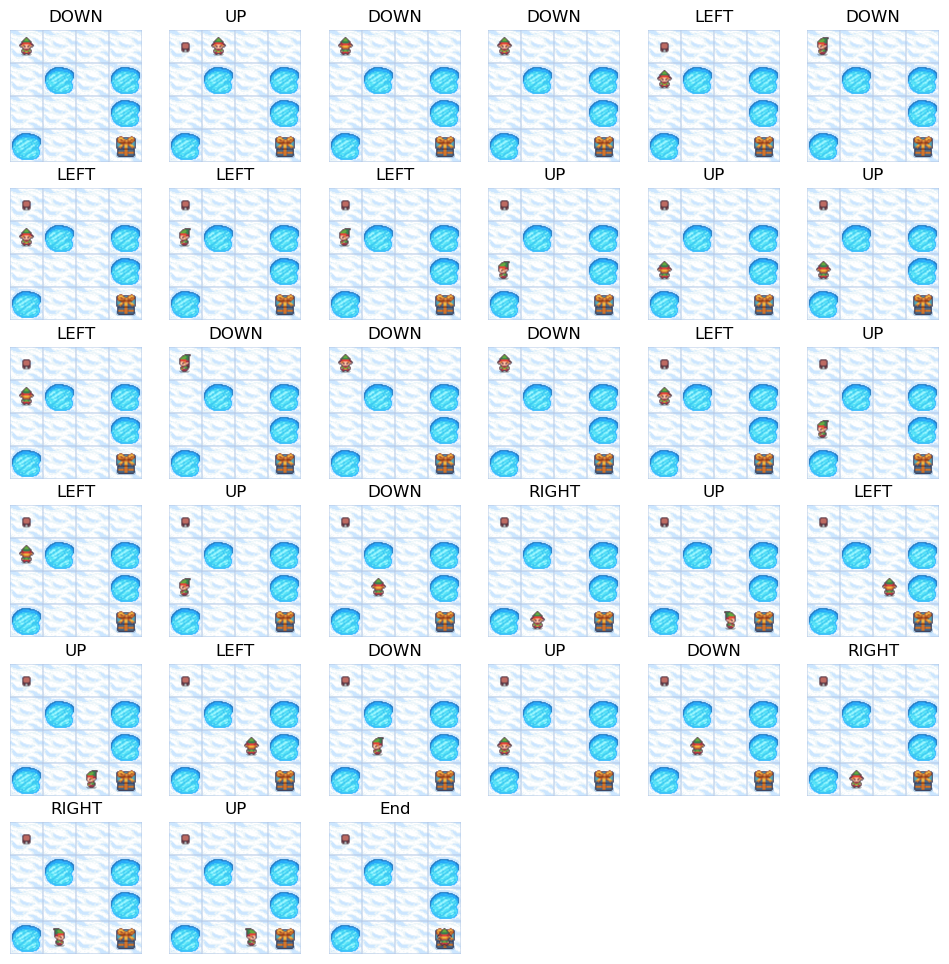

In [163]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.

visualize_game(env_screens)

## Conclution
Compare these 2 methods based on average return, penalty, episode length and success rate.
In the previous cells, if necessary, store the necessary variables for this comparison and use them in the following block.

I kept everything similar between two approaches, and in the same number of episodes, Q-Learning achieved a mean reward of 0.37 in the last 1000 episodes of the training process, while SARSA achieved a mean reward of 0.25 (these numbers may change a little with retraining). And also if we look at the mean rewards in training process, we can see that Q-Learning converges to its maximum reward faster than SARSA.
These are because of the bootstrapping nature of Q-Learning, which allows it to learn about the optimal policy, whereas SARSA learns about the current policy.

<br><br><br><br><br><br><br><br><br><br><br><br>

# 2. Monte Carlo method

In this notebook, you will learn about the Monte Carlo method in the context of reinforcement learning.
Your agent will move in the following picture. This is a random walk with two possible actions (`LEFT` and `RIGHT`).
The agent gets a reward of 1 if it reaches the right-most state, and 0 otherwise. You are going to use such an environment with 31 states.

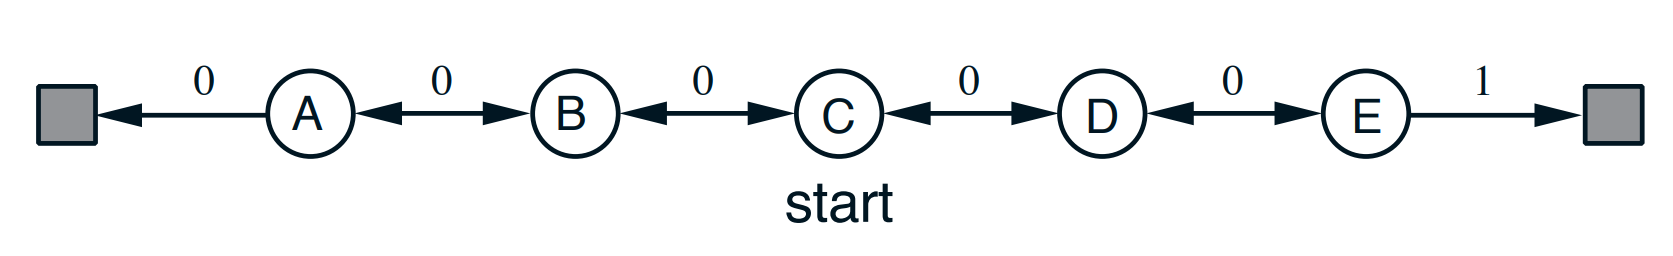

In [24]:
class RandomWalkEnv():
    def __init__(self, num_states=31, start=15, gamma=1):
        self.num_states = num_states
        self.start = start
        self.end = num_states - 1
        self.gamma = gamma
        self.state = None
        self.actions = ['LEFT', 'RIGHT']
        self.true_values = None

    def reset(self):
        self.state = self.start
        return self.state, 0, False

    def step(self, action):
        if self.state == self.end or self.state == 0:
            return self.state, 0, True
        action_direction = 0
        if action == 'RIGHT':
            action_direction = 1
        elif action == 'LEFT':
            action_direction = -1
        else:
            raise ValueError(f'Action {action} is not valid')

        self.state += action_direction
        reward, done = 0, False
        if self.state == self.end:
            reward, done = 1, True
        elif self.state == 0:
            done = True
        return self.state, reward, done

    def get_true_values(self):
        if self.true_values is not None:
            return self.true_values
        
        values = [0] * self.num_states

        values[self.end - 1] = 1
        for i in range(self.end - 1, 1, -1):
            values[i - 1] = self.gamma * values[i]

        self.true_values = values

        return values


The Monte Carlo method is a reinforcement learning technique for estimating the value function of a Markov decision process (MDP). It involves generating multiple episodes by following a given policy and computing the returns (sum of rewards) for each state-action pair. The value of a state-action pair is then estimated as the average of the returns obtained from that pair over multiple episodes.

The formula for updating the value function using the Monte Carlo method is:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t)} \sum_{i=1}^{N(S_t,A_t)}(G_i - Q(S_t,A_t))
\end{equation}

where $Q(S_t,A_t)$ is the estimated value of the state-action pair $(S_t,A_t)$, $N(S_t,A_t)$ is the number of times the state-action pair has been visited, $G_i$ is the return obtained from the $i$th visit to the state-action pair, and the sum is taken over all $N(S_t,A_t)$ visits.

To implement the Monte Carlo method, you need to define the environment, the policy, and the number of episodes to simulate. At each step of the episode, you observe the state, take an action according to the policy, and observe the reward and the next state. You then update the value function using the formula above. As more episodes are generated, the value estimates become more accurate.

In [48]:
Actions = {0: 'LEFT', 1: 'RIGHT'}

def policy(state, Q=None, epsilon=0.5, type='epsilon_greedy'):
    if Q is not None and np.nonzero(Q[state])[0].size == 0:
        type = 'random'
    if type == 'random':
        return np.random.choice([0, 1])
    elif type == 'greedy':
        return np.argmax(Q[state])
    elif type == 'epsilon_greedy':
        if np.random.random() < epsilon:
            return np.random.randint(0, 2)
        else:
            return np.argmax(Q[state])
        

def MC(env, num_episodes, alpha=0.1, first_visit=True):
    state = env.reset()[0]
    episode = []
    errors = []

    Q = np.zeros((env.num_states, len(env.actions)))
    
    for i in range(num_episodes):
        done = False

        while not done:
            action = policy(state, Q)
            next_state, reward, done = env.step(Actions[action])
            episode.append((state, action, reward))
            state = next_state

        G = 0
        if first_visit:
            visited_states = set()
            episode_copy = episode.copy()
            for i, (state, action, reward) in enumerate(episode_copy):
                if state not in visited_states:
                    visited_states.add(state)
                else:
                    episode[i] = (None, *episode[i][1:])

        for state, action, reward in reversed(episode):
            G = env.gamma * G + reward
            # update Q values
            if state is not None:
                Q[state, action] += alpha * (G - Q[state, action])
        
        pridicted_values = np.max(Q, axis=1)
        errors.append(np.sqrt(np.mean(np.power(env.get_true_values() - pridicted_values, 2))))

    values = np.max(Q, axis=1)
    return values, errors, Q

alpha=0.05: 100%|██████████| 100/100 [00:02<00:00, 42.28it/s]


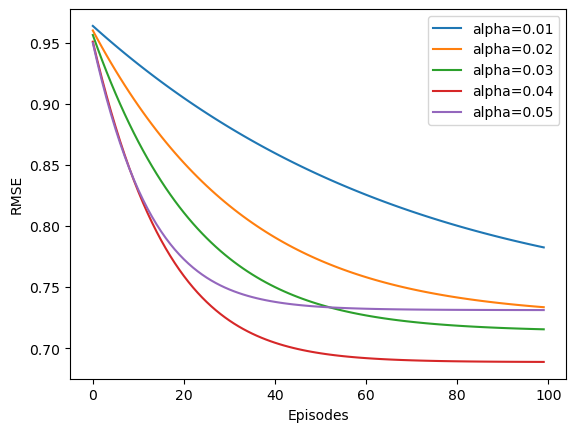

In [46]:
import tqdm
# Visualization

import matplotlib.pyplot as plt

env = RandomWalkEnv()
num_episodes = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
num_runs = 100

for alpha in alphas:
    rmse_avg = np.zeros(num_episodes)
    with tqdm.tqdm(range(num_runs), total=num_runs) as pbar:
        for run in pbar:
            pbar.set_description(f'alpha={alpha}')
            values, errors, _ = MC(env, num_episodes, alpha)
            rmse_avg += np.array(errors)
        rmse_avg /= num_runs
        plt.plot(range(num_episodes), rmse_avg, label=f'alpha={alpha}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

# Any visualization for better intuition would be appreciated.